----
<img src="../../files/refinitiv.svg" class="rft-examples-logo" width="20%" style="vertical-align: top;">

# Data Library for Python

----

## Access layer - Search templates examples - Equity Search

This notebook illustrates the Search Template functionality of the Refinitiv Data Library. The "Equity" template shown here are template examples that you can modify and adapt to your needs. They are defined in the "search-templates.config.json" configuration file. Below is a brief description of the parameters you can use for each template definition.

**Search templates are defined using the following JSON structure:**

- **description** (string): Description of the template.
- **parameters** (object): Parameters of the template. These parameters can be used as placeholders in the request_body of the template and as named parameters of the search() method of the template. Each parameter has a name, a description, and an optional default value.
- **request_body** (object): Body of the request sent to the Search REST API. This request body can include template parameters surrounded by '#{' and '}' (for example:  “#{my_param}”). More details on the structure of the request body can be found in the [Search API reference guide](https://apidocs.refinitiv.com/Apps/ApiDocs#/details/L2Rpc2NvdmVyeS9zZWFyY2gvdjE=/Lw==/POST/README) (access to this guide requires a Refinitiv Workspace account or RDP account to log in).
  
**Template example:**
  
```json
"MyTemplate": {
    "description": "Search template example.",
    "parameters": {
        "name": {
            "description": "Name of the person to search for.",
            "default": "Edison"
        }
    },
    "request_body": {
       "Query": "#{name}",
       "View":"People",
       "Top":10
    }
} 
```  

**Example of usage:**

```  
rd.discovery.search_templates["MyTemplate"].search(name="Pasteur")
```  
  

#### Learn more

To learn more about the Refinitiv Data Library for Python please join the Refinitiv Developer Community. By [registering](https://developers.refinitiv.com/iam/register) and [logging](https://developers.refinitiv.com/content/devportal/en_us/initCookie.html) into the Refinitiv Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
the [Refinitiv Data Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The Refinitiv Developer Community will be happy to help. 

#### Learn more

To learn more about the Refinitiv Data Library for Python please join the Refinitiv Developer Community. By [registering](https://developers.refinitiv.com/iam/register) and [logging](https://developers.refinitiv.com/content/devportal/en_us/initCookie.html) into the Refinitiv Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
the [Refinitiv Data Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The Refinitiv Developer Community will be happy to help. 

## Some Imports to start with

In [1]:
import refinitiv.data as rd
import cufflinks

### Extra configuration of `cufflinks` lib to not use online services

In [2]:
cufflinks.set_config_file(offline=True)

## Open the data session

The open_session() function creates and open sessions based on the information contained in the refinitiv-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [3]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x280010730 {name='workspace'}>

## Load the search templates configuration file

In [4]:
rd.load_config("search-templates.config.json")

<ConfigurationSet: 0x280010b50>

## Equities Search Template example

### Access the template

In [5]:
equity = rd.discovery.search_templates["Equity"]

### Get help about this template

In [6]:
help(equity)

Help on DiscoverySearchTemplate in module refinitiv.data.discovery._search_templates.search:

<DiscoverySearchTemplate 'Equity'>
    Search for Ordinary Shares of a particular exchange.
    
    Methods
    -------
    search
        exchange_name
            Name of the exchange where this equity is traded. For example: 'London Stock Exchange', 'Euronext Paris', 'Shanghai Stock Exchange', 'The Toronto Stock Exchange', 'NYSE Consolidated', etc.
    
        what
            What to search for
            default: ''



### Use the predefined parameters of the template to search for Equities of the London Stock Exchange

In [7]:
lse_equities = equity.search(exchange_name="London Stock Exchange")
display(lse_equities)

/Users/haykaz_aramyan/Library/CloudStorage/OneDrive-LondonStockExchangeGroup/Projects/RD Migration Examples/rd_migration/lib/python3.9/site-packages/refinitiv/data/content/search/_data_provider.py:309: UserWarning:

Search result for  not full.
Result is maxed at 10000 while the total is 18491 rows.
Requested - 10000, skipped - 0 rows.



,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
0,BP PLC,London Stock Exchange,BP.L,120133775488,75442000000,<NA>,0.68518,1.261008,-0.0874,"Energy/Energy/Oil, Gas & Consumable Fuels/Inte...",...,A:1L,British Penny,AC,QUOTExEQUITY,829400,GB0007980591,G12793108,0798059,<NA>,<NA>
1,Shell PLC,London Stock Exchange,SHEL.L,215138782877,171966000000,5.418448,0.566431,1.297339,5.76,"Energy/Energy/Oil, Gas & Consumable Fuels/Inte...",...,A:1L,British Penny,AC,QUOTExEQUITY,21264014,GB00BP6MXD84,G80827101,BP6MXD8,<NA>,<NA>
2,Rio Tinto PLC,London Stock Exchange,RIO.L,92528758743,50175000000,9.692113,0.459667,0.901122,7.6685,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,British Penny,AC,QUOTExEQUITY,1049519,GB0007188757,G75754104,0718875,<NA>,<NA>
3,Glencore PLC,London Stock Exchange,GLEN.L,79597108324,39931000000,4.778606,0.710478,1.819272,1.32397,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,British Penny,AC,QUOTExEQUITY,86386483,JE00B4T3BW64,G39420107,B4T3BW6,<NA>,<NA>
4,HSBC Holdings PLC,London Stock Exchange,HSBA.L,148672834109,167738000000,9.960946,0.93392,0.994589,0.75089,Financials/Banks/Banks/Diversified Banks,...,A:1L,British Penny,AC,QUOTExEQUITY,1049324,GB0005405286,G4634U169,0540528,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Enav SpA,London Stock Exchange,ENAVmi.TRE,2411063289,1234623616,<NA>,0.506356,<NA>,0.23738,Industrials/Transportation/Transportation Infr...,...,A:1L,Euro,AC,QUOTExEQUITY,279337534,IT0005176406,T3R4KN103,<NA>,<NA>,<NA>
9996,Volvo AB,London Stock Exchange,VOLVAst.TRE,42762287141,15573240178,<NA>,0.735741,<NA>,<NA>,Industrials/Capital Goods/Machinery/Constructi...,...,A:1L,Swedish Krona,AC,QUOTExEQUITY,279337568,SE0000115420,<NA>,<NA>,928856202,<NA>
9997,Billerud AB (publ),London Stock Exchange,BILLst.TRE,2894235897,1918074364,<NA>,0.4723,<NA>,20.017859,Materials/Materials/Containers & Packaging/Pap...,...,A:1L,Swedish Krona,AC,QUOTExEQUITY,279337582,SE0000862997,W16021102,<NA>,<NA>,<NA>
9998,Wacker Neuson SE,London Stock Exchange,WACde.TRE,1527251927,1367487840,<NA>,0.445795,<NA>,2.02301,Industrials/Capital Goods/Machinery/Constructi...,...,A:1L,Euro,AC,QUOTExEQUITY,279337616,DE000WACK012,D9553L101,<NA>,<NA>,<NA>


### Experiment with the returned DataFrame 

#### Define a function to plot and display data

In [8]:
def plot_and_display(df, column_name):
    df = df.sort_values(column_name,ascending = False)
    df[['DTSubjectName', column_name]].iplot(x='DTSubjectName')
    display(df)

#### Get the Equities by Market Cap

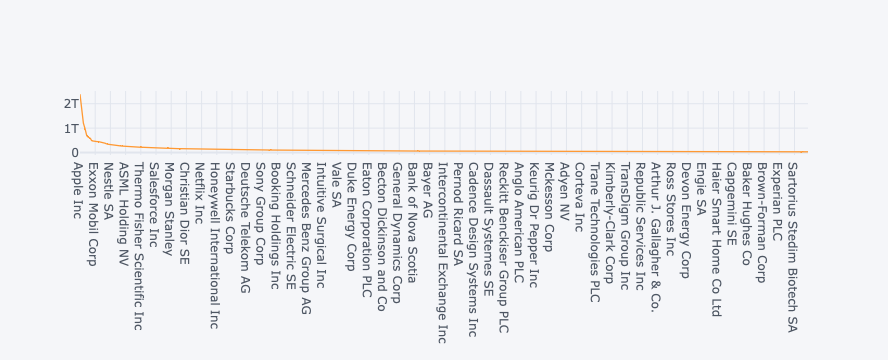

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
1845,Apple Inc,London Stock Exchange,0R2V.L,2389588504380,50672000000,25.364002,0.856354,0.942018,5.89694,Information Technology/Technology Hardware & E...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285518846,US0378331005,<NA>,B0YQ5W0,037833100,<NA>
3012,Apple Inc,London Stock Exchange,APCde.TRE,2389588504380,50672000000,<NA>,0.856354,<NA>,5.89694,Information Technology/Technology Hardware & E...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285519007,US0378331005,<NA>,<NA>,037833100,<NA>
1839,Microsoft Corp,London Stock Exchange,0QYP.L,1900328603939,166542000000,28.211559,0.54352,0.589091,8.99454,Information Technology/Software & Services/Sof...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285518884,US5949181045,<NA>,B10RVH1,594918104,<NA>
3020,Microsoft Corp,London Stock Exchange,MSFde.TRE,1900328603939,166542000000,<NA>,0.54352,<NA>,8.99454,Information Technology/Software & Services/Sof...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285519023,US5949181045,<NA>,<NA>,594918104,<NA>
3077,Alphabet Inc,London Stock Exchange,ABECde.TRE,1201583710000,<NA>,<NA>,<NA>,<NA>,4.55165,Communication Services/Media & Entertainment/I...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285519045,US02079K1079,<NA>,<NA>,02079K107,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Ashtead Group PLC,London Stock Exchange,AHT.L,30224024457,5033700000,19.533701,0.670787,1.708805,3.35961,Industrials/Capital Goods/Trading Companies & ...,...,A:1L,British Penny,AC,QUOTExEQUITY,1081144,GB0000536739,G05320109,0053673,<NA>,<NA>
5006,Thales SA,London Stock Exchange,0IW5.L,30132174415,6889642319,<NA>,0.795239,<NA>,5.74328,Industrials/Capital Goods/Aerospace & Defense/...,...,A:1L,Euro,AC,QUOTExEQUITY,40459937,FR0000121329,F9156M108,B28MVD1,<NA>,<NA>
5709,Thales SA,London Stock Exchange,HOpa.TRE,30132174415,6889642319,<NA>,0.795239,<NA>,5.74328,Industrials/Capital Goods/Aerospace & Defense/...,...,A:1L,Euro,AC,QUOTExEQUITY,279333959,FR0000121329,F9156M108,<NA>,<NA>,<NA>
2182,Public Service Enterprise Group Inc,London Stock Exchange,0KS2.L,30110739466,13729000000,30.495638,0.718195,<NA>,2.05886,Utilities/Utilities/Multi-Utilities/Multi-Util...,...,A:1L,US Dollar,AC,QUOTExEQUITY,287071327,US7445731067,<NA>,BYZHC07,744573106,<NA>


In [9]:
equities = lse_equities.query("MktCapCompanyUsd >= 30_000_000_000")
plot_and_display(equities, "MktCapCompanyUsd")

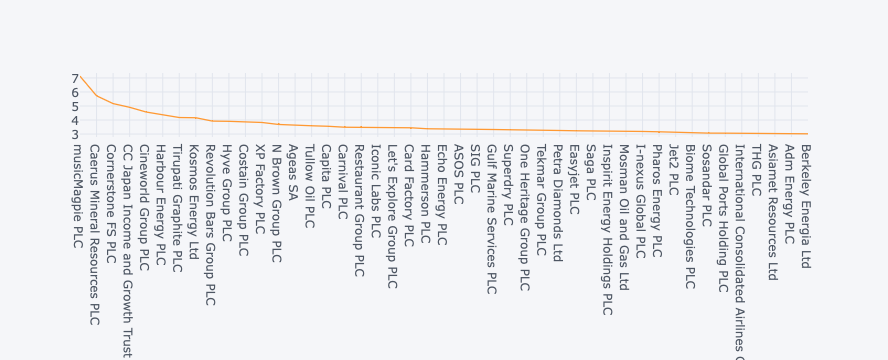

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
765,musicMagpie PLC,London Stock Exchange,MMAG.L,51401266,29237936,10.825588,0.320195,7.123956,0.03658,Consumer Discretionary/Retailing/Internet & Di...,...,A:1L,British Penny,AC,QUOTExEQUITY,509315483,GB00BKY4XG48,G572HZ105,BKY4XG4,<NA>,<NA>
1427,Caerus Mineral Resources PLC,London Stock Exchange,CMRS.L,3684917,6042322,<NA>,0.106208,5.726183,-0.03177,<NA>,...,A:1L,British Penny,AC,QUOTExEQUITY,502270313,GB00BMDQ4L78,G1R46A105,BMDQ4L7,<NA>,<NA>
1439,Cornerstone FS PLC,London Stock Exchange,CSFS.L,5184764,311390,<NA>,0.820438,5.171552,-0.27394,<NA>,...,A:1L,British Penny,AC,QUOTExEQUITY,505647007,GB00BNG7CD28,G2424B102,BNG7CD2,<NA>,<NA>
1836,CC Japan Income and Growth Trust PLC,London Stock Exchange,CCJS.L,258086728,245112728,<NA>,0.024065,4.907048,<NA>,<NA>,...,A:1L,British Penny,AC,QUOTExEQUITY,495510383,GB00BM90B010,G1986V118,BM90B01,<NA>,<NA>
373,Cineworld Group PLC,London Stock Exchange,CINE.L,48285357,-345000000,<NA>,1.033267,4.57011,-0.25085,Communication Services/Media & Entertainment/E...,...,A:1L,British Penny,AC,QUOTExEQUITY,33010318,GB00B15FWH70,G219AH100,B15FWH7,<NA>,<NA>
112,Harbour Energy PLC,London Stock Exchange,HBR.L,3002789653,473500000,3.363528,0.967355,4.379836,1.07976,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,A:1L,British Penny,AC,QUOTExEQUITY,1080131,GB00BMBVGQ36,G4289T111,BMBVGQ3,<NA>,<NA>
637,Tirupati Graphite PLC,London Stock Exchange,TGRT.L,36276504,18959628,<NA>,0.1011,4.177405,-0.0266,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,British Penny,AC,QUOTExEQUITY,464325981,GB00BFYMWJ95,G8T09D107,BFYMWJ9,<NA>,<NA>
2688,Kosmos Energy Ltd,London Stock Exchange,KOS.L,3690467020,<NA>,16.383494,<NA>,4.162994,0.46518,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,A:1L,British Penny,AC,QUOTExEQUITY,269548375,US5006881065,<NA>,BJ1MZF7,500688106,<NA>
970,Revolution Bars Group PLC,London Stock Exchange,RBG.L,22850719,-27717284,8.795309,1.176777,3.923434,0.00938,Consumer Discretionary/Consumer Services/Hotel...,...,A:1L,British Penny,AC,QUOTExEQUITY,181974050,GB00BVDPPV41,G7546B104,BVDPPV4,<NA>,<NA>
403,Hyve Group PLC,London Stock Exchange,HYVE.L,365181078,224702520,<NA>,0.605594,3.907381,-0.08595,Communication Services/Media & Entertainment/M...,...,A:1L,British Penny,AC,QUOTExEQUITY,1082258,GB00BKP36R26,G4690X123,BKP36R2,<NA>,<NA>


In [10]:
equities = lse_equities.query("Beta >= 3")
plot_and_display(equities, "Beta")

#### Get the Equities by Share Holders Equity

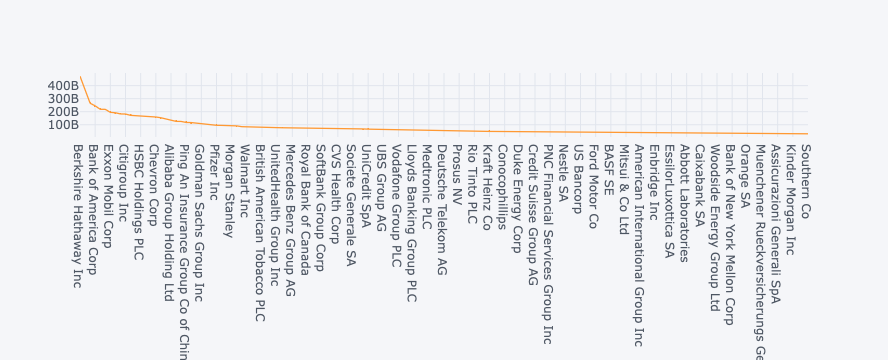

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
3164,Berkshire Hathaway Inc,London Stock Exchange,BRYNde.TRE,686145044677,472360000000,<NA>,0.493262,<NA>,-10.32,Financials/Diversified Financials/Diversified ...,...,A:1L,US Dollar,AC,QUOTExEQUITY,286567046,US0846707026,<NA>,<NA>,084670702,<NA>
3474,Berkshire Hathaway Inc,London Stock Exchange,0HN0.L,686145044677,472360000000,<NA>,0.493262,0.885787,-15471.05209,Financials/Diversified Financials/Diversified ...,...,A:1L,US Dollar,AC,QUOTExEQUITY,288061676,US0846701086,<NA>,BG05R83,084670108,<NA>
7916,Berkshire Hathaway Inc,London Stock Exchange,BRHde.TRE,686145044677,472360000000,<NA>,0.493262,<NA>,-15471.05209,Financials/Diversified Financials/Diversified ...,...,A:1L,US Dollar,AC,QUOTExEQUITY,288073919,US0846701086,<NA>,<NA>,084670108,<NA>
1879,Berkshire Hathaway Inc,London Stock Exchange,0R37.L,686145044677,472360000000,<NA>,0.493262,0.831717,-10.32,Financials/Diversified Financials/Diversified ...,...,A:1L,US Dollar,AC,QUOTExEQUITY,286489815,US0846707026,<NA>,BSJC6M6,084670702,<NA>
8150,China Construction Bank Corp,London Stock Exchange,C6Tf.TRE,161233443663,365766904892,<NA>,0.913594,<NA>,1.2462,Financials/Banks/Banks/Diversified Banks,...,A:1L,Euro,AC,QUOTExEQUITY,332113811,CNE1000002H1,Y1397N101,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,Commerzbank AG,London Stock Exchange,0RLW.L,15551997513,30675446399,<NA>,0.936947,<NA>,0.95625,Financials/Banks/Banks/Diversified Banks,...,A:1L,Euro,AC,QUOTExEQUITY,348790420,DE000CBK1001,D172W1279,B9FBZ49,<NA>,<NA>
3661,Holcim AG,London Stock Exchange,LHNs.TRE,39004013716,30641162641,<NA>,0.485895,<NA>,5.47556,Materials/Materials/Construction Materials/Con...,...,A:1L,Swiss Franc,AC,QUOTExEQUITY,279335280,CH0012214059,H3816Q102,<NA>,<NA>,<NA>
3373,Holcim AG,London Stock Exchange,0QKY.L,39004013716,30641162641,<NA>,0.485895,<NA>,5.47556,Materials/Materials/Construction Materials/Con...,...,A:1L,Swiss Franc,AC,QUOTExEQUITY,154081265,CH0012214059,H3816Q102,B103S45,<NA>,<NA>
7745,Southern Co,London Stock Exchange,SOTf.TRE,70572122230,30408000000,<NA>,0.744001,<NA>,3.27116,Utilities/Utilities/Electric Utilities/Electri...,...,A:1L,US Dollar,AC,QUOTExEQUITY,287071944,US8425871071,<NA>,<NA>,842587107,<NA>


In [11]:
equities = lse_equities.query("ShareholdersEquityUsd >= 30_000_000_000")
plot_and_display(equities, "ShareholdersEquityUsd")

#### Get Equities by PE

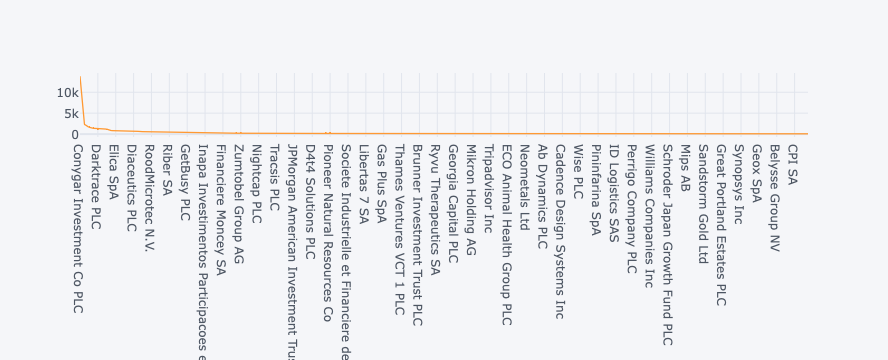

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
1205,Conygar Investment Co PLC,London Stock Exchange,CIC.L,89397050,150023216,13833.333333,0.058206,0.732645,0.00009,Real Estate/Real Estate/Real Estate Management...,...,A:1L,British Penny,AC,QUOTExEQUITY,14366399,GB0033698720,G2404N100,3369872,<NA>,<NA>
2415,va Q tec AG,London Stock Exchange,0RJD.L,363702114,54911090,2325.0,0.644219,<NA>,-0.23436,Industrials/Capital Goods/Machinery/Industrial...,...,A:1L,Euro,AC,QUOTExEQUITY,281899196,DE0006636681,D8T66F105,BYT3WK1,<NA>,<NA>
6262,Attica Holdings SA,London Stock Exchange,0IKL.L,573611930,384557313,1646.464646,0.619896,<NA>,-0.04486,Industrials/Transportation/Marine/Marine,...,A:1L,Euro,AC,QUOTExEQUITY,281898667,GRS144003001,X0265K109,B28F6W4,<NA>,<NA>
6278,Finanzas E Inversiones Valencianas SA,London Stock Exchange,0HSJ.L,45510177,12500369,1376.636802,0.013893,<NA>,0.05868,Real Estate/Real Estate/Real Estate Management...,...,A:1L,Euro,AC,QUOTExEQUITY,281898699,ES0138152113,E3574V106,B28H608,<NA>,<NA>
175,Darktrace PLC,London Stock Exchange,DARK.L,2274950698,314688000,1326.223251,0.568543,2.859685,0.00243,Information Technology/Software & Services/Sof...,...,A:1L,British Penny,AC,QUOTExEQUITY,507473311,GB00BNYK8G86,G2658M105,BNYK8G8,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,Regency Centers Corp,London Stock Exchange,0KUT.L,10840365620,6096985000,72.656048,0.431131,<NA>,2.81087,Real Estate/Real Estate/Equity Real Estate Inv...,...,A:1L,US Dollar,AC,QUOTExEQUITY,287071340,US7588491032,<NA>,BYZHCD0,758849103,<NA>
6762,CPI SA,London Stock Exchange,0OKA.L,6810993,3084630,72.571429,0.690258,<NA>,0.0209,Information Technology/Technology Hardware & E...,...,A:1L,Euro,AC,QUOTExEQUITY,281900366,GRS413313008,X1755D100,B28GLZ5,<NA>,<NA>
335,Mitchells & Butlers PLC,London Stock Exchange,MAB.L,1131379572,2580172000,71.5,0.567158,2.171496,0.022,Consumer Discretionary/Consumer Services/Hotel...,...,A:1L,British Penny,AC,QUOTExEQUITY,11842536,GB00B1FP6H53,G61614122,B1FP6H5,<NA>,<NA>
1475,Fair Oaks Income Ltd,London Stock Exchange,FA17.L,231917819,<NA>,70.668187,<NA>,0.15529,0.007924,<NA>,...,A:1L,US Dollar,AC,QUOTExEQUITY,159409848,GG00BPLGZM85,G3247H151,BPLGZM8,<NA>,<NA>


In [12]:
equities = lse_equities.query("Pe >= 70")
plot_and_display(equities, "Pe")

#### Get Equities by Debt Ratio

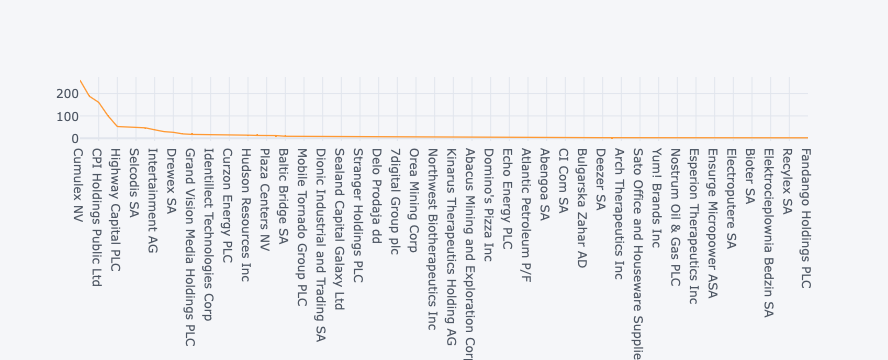

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
8476,Cumulex NV,London Stock Exchange,0G5Tbr.TRE,1244369,-2368660,<NA>,259.752613,<NA>,-0.13904,<NA>,...,A:1L,Euro,AC,QUOTExEQUITY,40464705,BE0003463685,B87945109,<NA>,<NA>,<NA>
7449,Cumulex NV,London Stock Exchange,0G5T.L,1244369,-2368660,<NA>,259.752613,<NA>,-0.13904,<NA>,...,A:1L,Euro,AC,QUOTExEQUITY,281905517,BE0003463685,B87945109,B28MPS4,<NA>,<NA>
1342,Hamak Gold Ltd,London Stock Exchange,HAMA.L,5337412,-355380,<NA>,188.042105,<NA>,-3.655,Materials/Materials/Metals & Mining/Gold,...,A:1L,British Penny,AC,QUOTExEQUITY,588525851,VGG4256S1048,G4256S104,BMDHNP7,<NA>,<NA>
7455,CPI Holdings Public Ltd,London Stock Exchange,0J0F.L,103677,-62856,<NA>,160.783784,<NA>,-0.00093,Financials/Diversified Financials/Capital Mark...,...,A:FP,Euro,AC,QUOTExEQUITY,281905534,CY0001600416,M2685Q106,B28GLY4,<NA>,<NA>
7851,Zinc One Resources Inc,London Stock Exchange,0VPH.L,306781,-1168748,<NA>,100.230481,<NA>,-0.02616,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,Canadian Dollar,AC,QUOTExEQUITY,288061531,CA98959W2031,<NA>,BM8ZS17,98959W203,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,Recylex SA,London Stock Exchange,0FV0.L,<NA>,-42542884,292.324744,2.081927,<NA>,<NA>,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,Euro,AC,QUOTExEQUITY,281898796,FR0000120388,F7699L157,B28K6J6,<NA>,<NA>
619,Dukemount Capital PLC,London Stock Exchange,DKE.L,1112935,-743879,<NA>,2.028071,1.647252,-0.0021,Real Estate/Real Estate/Real Estate Management...,...,A:1L,British Penny,AC,QUOTExEQUITY,255923136,GB00B6WZDF03,G2861J105,B6WZDF0,<NA>,<NA>
5663,Dukemount Capital PLC,London Stock Exchange,DKEl.TRE,1112935,-743879,<NA>,2.028071,<NA>,-0.0021,Real Estate/Real Estate/Real Estate Management...,...,A:1L,British Penny,AC,QUOTExEQUITY,279333183,GB00B6WZDF03,G2861J105,<NA>,<NA>,<NA>
1679,Fandango Holdings PLC,London Stock Exchange,FHP.L,<NA>,-470764,<NA>,2.012953,<NA>,-0.00271,<NA>,...,A:1L,British Penny,AC,QUOTExEQUITY,265779074,GB00BF2P0G38,G330AM104,BF2P0G3,<NA>,<NA>


In [13]:
equities = lse_equities.query("DebtToAssets >= 2")
plot_and_display(equities, "DebtToAssets")

### Get Vodafone related equities and use get_data() to retrieve additional information 

In [14]:
vod_equities = equity.search(what="vodafone", exchange_name="London Stock Exchange")

rd.get_data(
    universe=vod_equities['RIC'].to_list(),
    fields=['TR.RevenueSmartEst.date', 'TR.RevenueSmartEst', 'TR.NetprofitSmartEst', 'TR.EpsSmartEst']
)

,Instrument,Date,Revenue - SmartEstimate®,Net Income - SmartEstimate®,Earnings Per Share - SmartEstimate®
0,VOD.L,2023-02-14,45760662440,3112217020,0.11088
1,VODl.TRE,2023-02-14,45760662440,3112217020,0.11088
2,0QBL.L,NaT,<NA>,<NA>,<NA>
3,0QBLic.TRE,NaT,<NA>,<NA>,<NA>
4,AU0000090128.TRE,2023-03-06,5638915480,317721750,0.1534


## Close the session

In [15]:
rd.close_session()